### Understanding and cleaning Data:

**Tools:**

In [1]:
import time                                                 # para tiempo
inicio=time.time()                                          # momento inicial

   
import pandas as pd                                         # dataframe
import numpy as np                                          # numerical python, algebra lineal

import matplotlib.pyplot as plt                             # plots, graficos
import seaborn as sns                                       # plots

#from sklearn.metrics import confusion_matrix                # metricas, matriz de confusion
#from scipy.optimize import minimize                         # minimizar, opt


import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import ComplementNB as CNB

In [3]:
from sklearn.linear_model import *
from sklearn.linear_model import LinearRegression as LinReg

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [4]:
def highnull(x):
    return x.isnull().mean() * 100
    

### Limpieza de Nans

In [5]:
#data.dropna(thresh=len(data)//2,axis=1, inplace=True)
#trash_1 = list(data.loc[:, data.isna().sum() >= 1000])
def delete_nan(df):
    data_1 = df.loc[:, df.isnull().mean() >= .5]
    print(data_1.columns)
    return df.drop(data_1,axis=1,inplace=True)

### Limpieza de columnas:

In [6]:
def trash_d(df):
    df_col = df.columns
    trash = []
    for i in df_col:
        if 'url' in i:

            trash.append(i)
        elif 'id' in i:

            trash.append(i)
        elif 'name' in i:

            trash.append(i)
        elif 'scrape' in i:

            trash.append(i)
        elif 'license' in i: #is it relevant??

            trash.append(i)
        elif 'latitude' in i:

            trash.append(i)
        elif 'longitude' in i:

            trash.append(i)

    print(trash)
    return df.drop(trash,axis=1,inplace=True)
       

### Analizar la correlacion entre las columnas y eliminar las que tienen corr > 90%

In [7]:
def bin_corr_col(x):
                                        
    corr_matrix = x.corr().abs()# Create correlation matrix
                                        
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]# Find features with correlation greater than 0.90

    return x.drop(to_drop, axis=1, inplace=True) # Drop features

### Funcion para limpiar columna de 'Bathroom text'

In [8]:
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

### Rellenamos los Nan:
**1. Probado con '0': Con**
        * Fill Nan con '0' en la Primera configuracion, no tan mal resultado, MSE (ERROR CUADRATICO MEDIO), entre un 90-100?? (comprobar)
        
**2. Probamos con la media:**

El resultado no es muy bueno, baja mucho el R2:

    *LinearRegression()
    Train: 0.12894611727789396
    Test: 0.01727127223742142


    *Lasso()
    Train: 0.12811313569267202
    Test: 0.025081710551917435


    *ElasticNet()
    Train: 0.04618899858216652
    Test: 0.014876397066942215


    *SVR()
    Train: -0.07422589078257924
    Test: -0.032186379563503564


    *RandomForestRegressor()
    Train: 0.7739665525976065
    Test: 0.0062841148035271965


    *SGDClassifier()
    Train: 0.01201923076923077
    Test: 0.007198080511863503


    *GaussianNB()
    Train: 0.31009615384615385
    Test: 0.00959744068248467


    *MultinomialNB()
    Train: 0.08173076923076923
    Test: 0.018661690215942415


    *ComplementNB()
    Train: 0.038461538461538464
    Test: 0.022394028259130897

**3. Volvemos a probar con fill Nan '0':**

Anque en algunos modelos mejora en el Train, en el Test solo empeora y aumenta el overfiting.

    *LinearRegression()
    Train: 0.13040583567123631
    Test: 0.016851720953881655


    *Lasso()
    Train: 0.1296826051474378
    Test: 0.024902425964481112


    *ElasticNet()
    Train: 0.04788916546070876
    Test: 0.016609313108287616


    *SVR()
    Train: -0.07422560937966005
    Test: -0.032186302713010706


    *RandomForestRegressor()
    Train: 0.7822522061872766
    Test: -0.00020344848606912436


    *SGDClassifier()
    Train: 0.007211538461538462
    Test: 0.0018661690215942416


    *GaussianNB()
    Train: 0.3076923076923077
    Test: 0.008531058384430818


    *MultinomialNB()
    Train: 0.09375
    Test: 0.018661690215942415


    *ComplementNB()
    Train: 0.038461538461538464
    Test: 0.022127432684617435

**4. Volvemos a rellenar los valores Nan con 0, y volvemos a analizar los datos:**

In [9]:
def fill_nan(df):
    
    for i in df.columns:
        
        df.fillna(0, axis=0, inplace=True)

    print(df.isna().sum())

### Funcion para entrenar Modelo:

In [10]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

**General Function**

In [11]:
def general_function(df):
    
    df_num = df.copy()
    
    df_num_1 = df_num._get_numeric_data()
    
    #Delete columns with 50% or more Nan values.
    #df_num_2 = df_num_1.apply(delete_nan)
    
    #Delete trash columns.
    df_num_2 = df_num_1.apply(trash_d)
    
    #Delete columns with higher correlation of 90%
    df_num_3 = df_num_2.apply(bin_corr_col)
    
    sns.heatmap(df_num_3.corr());
    
    return df_num_3   

## Resultados subidos a Kaggle:

### 1er Modelo, con RFR, Filtrado, 
* get numeric, 
* simple trash,
* basic corr 90%
* Nos da mse de 90

## 1.Train CSV:

**Import Train Data** 

In [12]:
df_train = pd.read_csv('data/train.csv')

In [13]:
df_TN = df_train._get_numeric_data()

### 1.1 Train DF: Aplicamos funciones:

In [14]:
trash_d(df_TN)

['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


In [15]:
delete_nan(df_TN)


Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')


In [16]:
bin_corr_col(df_TN)

### 1.2 Train DF:  Add Bathroom numeric column 

In [17]:
df_TN['bathrooms']= df_train.bathrooms_text.apply(limpieza_ba)

In [18]:
df_TN.columns

Index(['host_listings_count', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'availability_30', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'bathrooms'],
      dtype='object')

### 1.3 Train DF: Eliminamos columnas: (en proceso de afinar)

In [19]:
### All this columns a have a variance ratio very far from one, i will delet them, and add, the bathroom column
columns_1 = ['beds','minimum_maximum_nights',
       'maximum_maximum_nights', 'availability_30', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [20]:
df_TN.drop(columns_1, axis=1, inplace=True)

In [21]:
corr_matrix = df_TN.corr().abs()# Create correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]# Find features with correlation greater than 0.90
to_drop
    #return x.drop(to_drop, axis=1, inplace=True)

[]

In [22]:
df_TN.columns

Index(['host_listings_count', 'accommodates', 'bedrooms', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'bathrooms'],
      dtype='object')

### 1.4 Test DF: Hacer Fillna with mean... try

In [23]:
fill_nan(df_TN)

host_listings_count     0
accommodates            0
bedrooms                0
price                   0
minimum_nights          0
maximum_nights          0
review_scores_rating    0
bathrooms               0
dtype: int64


### 1.5 Train DF:  Have a look to the correlation of the columns;

* 

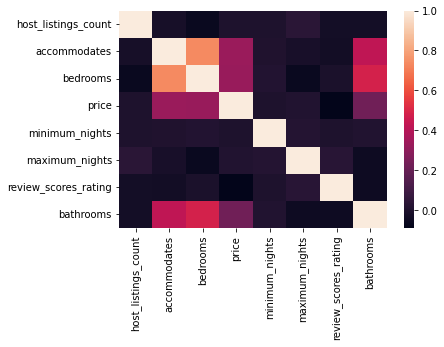

In [24]:
sns.heatmap(df_TN.corr());

## 1.5 Train DF: OBSERVACIONES DE LA correlacion entre las columas:

**Registro de Modificaciones de columnas por su coorelacion:**



Actualmente contamos con las siguites columnas: 
- host_listings_count
- accommodates
- bedrooms 
- price
- minimum_nights
- maximum_nights
- review_scores_rating
- bathrooms


       *LinearRegression()
    Train: 0.4175408429965264
    Test: 0.0852930320088775

       *Lasso()
    Train: 0.41677703057289106
    Test: 0.09269214425155403


       *ElasticNet()
    Train: 0.39286894455853005
    Test: 0.10849503516950687


       *SVR()
    Train: -0.07420733292675563
    Test: -0.03217854177482837


       *RandomForestRegressor()
    Train: 0.8859091190996429
    Test: 0.07693120479600035


*Observamos que las columnas de acomodates & bedrooms estan muy relacionadas con bathrooms, esto nos puede estar generando el over fitting que tenemos:* 

**En cierto modo tiene sentido que estas dos variables esten relacionadas pues una casa con varios cueros de baños, sera iuna cas con mas cuartos y por ende mas camas, en resultado sera mas cara, todo esto puede ser representado por el numero de cuartos de baños que tenga una casa.**

**Eliminamos:**

- accommodates
- bedrooms

### 1.6 Train DF: Eliminar Columnas con Corr: (AFINANDO):

**observaciones:**

*

In [25]:
testeo =['accommodates','bedrooms']

In [26]:
df_TN.drop(testeo, axis=1, inplace=True)

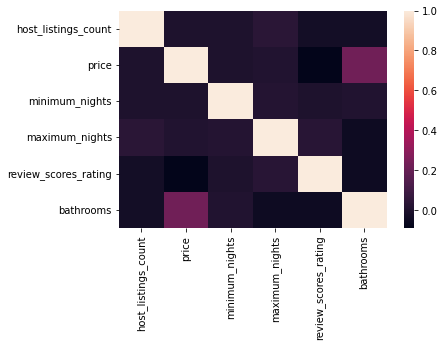

In [27]:
sns.heatmap(df_TN.corr());

In [28]:
# x.drop(to_drop, axis=1, inplace=True)

In [29]:
df_TN.head()

,host_listings_count,price,minimum_nights,maximum_nights,review_scores_rating,bathrooms
0,13,87.0,2,1125,4.62,1
1,0,250.0,2,1125,5.00,1
2,20,151.0,1,1125,4.79,1
3,1,139.0,2,30,5.00,1
4,1,95.0,2,7,4.67,1


In [30]:
df_TN.shape

(4167, 6)

In [31]:
#df_TN.drop(columns_1, axis=1, inplace=True)

### 1.7 Aplicamos PCA

## 2. Test CSV:

**Import Test Data**

In [32]:
new_data=pd.read_csv('data/test.csv')
new_data.shape

(1389, 73)

In [33]:
df_test = new_data._get_numeric_data()

### 2.1 Test DF: Aplicamos Funciones

In [34]:
trash_d(df_test)


['id', 'scrape_id', 'host_id', 'latitude', 'longitude']


In [35]:
delete_nan(df_test)

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')


In [36]:
bin_corr_col(df_test)

In [37]:
fill_nan(df_test)

host_listings_count                             0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0


In [38]:
df_test.shape

(1389, 25)

### 2.2 Test DF: Add Bathroom numeric column 

In [39]:
df_test['bathrooms']= new_data.bathrooms_text.apply(limpieza_ba)

In [40]:
df_test.isna().sum()

host_listings_count                             0
accommodates                                    0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0


### 2.3 Test DF: Eliminamos columnas: (en proceso de afinar)

In [41]:
df_test.drop(columns_1, axis=1, inplace=True)

### 2.4 Test DF: Hacer Fillna with mean... try

In [42]:
fill_nan(df_test)

host_listings_count     0
accommodates            0
bedrooms                0
minimum_nights          0
maximum_nights          0
review_scores_rating    0
bathrooms               0
dtype: int64


In [43]:
corr_matrix = df_test.corr().abs()# Create correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]# Find features with correlation greater than 0.90
to_drop
    #return x.drop(to_drop, axis=1, inplace=True)

[]

### 2.5 Test DF: Have a look to the correlation of the columns;

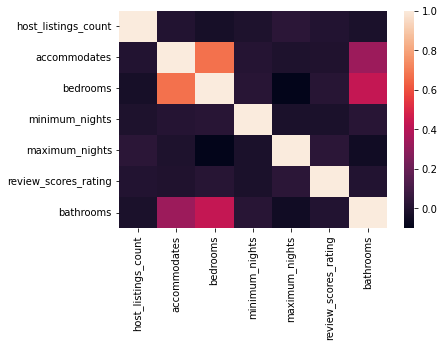

In [44]:
sns.heatmap(df_test.corr());

In [45]:
df_test.drop(testeo, axis=1, inplace=True)

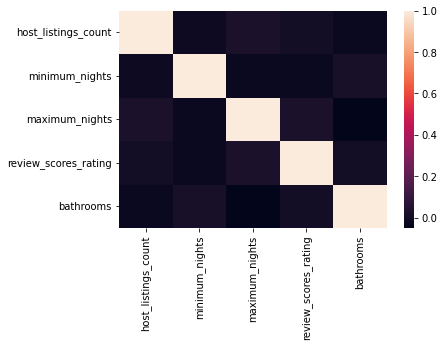

In [46]:
sns.heatmap(df_test.corr());

## 3. PCA: 
* PCA, Dividir modelo (X-y), 


### PCA 

In [47]:
pca=PCA()

pca.fit(df_TN)

PCA()

In [48]:
pca.explained_variance_ratio_ # Mas cercano a cero
# 

array([8.92390736e-01, 1.05297216e-01, 1.62668915e-03, 6.78462574e-04,
       6.39961855e-06, 4.96073902e-07])

In [49]:
sum(pca.explained_variance_ratio_)

1.0

In [50]:
df_TN.shape

(4167, 6)

## 4. Listamos las columnas de los Data frames Train & Test

In [51]:
df_test.shape,df_TN.shape

((1389, 5), (4167, 6))

#### Train Data frame  (NUESTRO)

In [52]:
df_TN.isna().sum()

host_listings_count     0
price                   0
minimum_nights          0
maximum_nights          0
review_scores_rating    0
bathrooms               0
dtype: int64

#### Test de Data Frame

In [53]:
df_test.isna().sum()

host_listings_count     0
minimum_nights          0
maximum_nights          0
review_scores_rating    0
bathrooms               0
dtype: int64

## 5. Entrenamos Modelos:

### 5.1 Dividimos el Data Frame en X & y

In [54]:
X=df_TN.drop('price', axis=1)
y=df_TN.price

Probado con 0.9 mAL 
probado con 0.15 ? 

In [55]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.15, random_state=42)

### 5.2 Entrenamos modelos:

### Cuales de estos modelos son realemnte relevantes para la prediccion de Precio (Hacer busqueda en internet)

In [56]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')


Un R2 negativo **FUEGO AL PROCESO**, no sirve la seleccion de caracteristicas no es la correcta.

    *RandomForestRegressor()
    Train: 0.6546076726525671
    Test: -2.5553085963590485


In [57]:
modelos=[LinReg(), Lasso(), ElasticNet(), SVR(),RFR(),SGDC(),GNB(),MNB(),CNB()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.05049164691721775
Test: 0.12941395395101973


Lasso()
Train: 0.05031217364467355
Test: 0.12720541695822507


ElasticNet()
Train: 0.026118955742512773
Test: 0.05010493778477254


SVR()
Train: -0.02814854586297799
Test: -0.05561995462896929


RandomForestRegressor()
Train: 0.6546076726525671
Test: -2.5553085963590485


SGDClassifier()
Train: 0.01327308669867269
Test: 0.004792332268370607


GaussianNB()
Train: 0.057046032194295396
Test: 0.001597444089456869


MultinomialNB()
Train: 0.02005083309799492
Test: 0.004792332268370607


ComplementNB()
Train: 0.01383789889861621
Test: 0.01597444089456869




In [58]:
def regre(modelo):
    
    modelo.fit(X_train_d, y_train_d)
    
    train_score=modelo.score(X_train_d, y_train_d)  # R2
    test_score=modelo.score(X_test_d, y_test_d)
    
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    
    return modelo

**OJO!! Definicion de modelo unicamente con Train**

In [59]:
X_train_d, X_test_d, y_train_d, y_test_d = tts(df_TN.drop('price',axis=1), 
                                               df_TN.price)

In [60]:
df_TN.head(2)

,host_listings_count,price,minimum_nights,maximum_nights,review_scores_rating,bathrooms
0,13,87.0,2,1125,4.62,1
1,0,250.0,2,1125,5.00,1


In [61]:
regre(modelo)

NameError: name 'modelo' is not defined

### Definicion y activcion del modelo:

In [ ]:
modelo=RFR()

modelo.fit(X_train, y_train)

### R2

In [ ]:
modelo.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

In [ ]:
y_pred=modelo.predict(X_test)

#### MSE (ERROR CUADRATICO MEDIO) 1 No confiar & 0.85746 Muy bien & 0.24343445 Regular

In [ ]:
mse(y_pred, y_test, squared=False)

## 5. Model Testing in Test Data

**Using RFR on Test Data**

In [ ]:
y_pred=modelo.predict(df_test)

In [ ]:
y_pred.shape

In [ ]:
f"Train : {modelo.score(X_train, y_train)} Test: {modelo.score(X_test, y_test)}"


## Importante!!

### Hacer funcion de este proceso para generar DF con las dos columnas de todos los modelos:

In [ ]:
sample_df=pd.DataFrame()


sample_df['id']=[str(i) for i in range(len(y_pred))]
sample_df['price']=y_pred

sample_df.shape

In [ ]:
sample_df.head()

### Guardar modelo para subir ala competicion de Kaggle: (Hacer solo si se mejora el anterior resultado)

In [ ]:
#sample_df.to_csv('data/sample_df.csv',index=False)

### Guardar los modelos en un Diccionario: (Tengo que afinarlo)

modelos=[LinReg(), Lasso(), ElasticNet(), SVR(),RFR(),SGDC(),GNB(),MNB(),CNB()]
* dict_fit = {}
    * for k,v in enumerate(modelos):
        dict_fit[k]=prueba_modelo(v)

### PREGUNTA: XQ ,ME SALE NONE EN VALUE KEYS???

In [ ]:
#dict_fit